In [1]:
import pandas as pd
from matplotlib import pyplot as plt
n_steps = 1000
n_particles = 100000

In [23]:
data = pd.read_csv('particle_records.csv', header=None, names=['step','i','x', 'y', 'z', 'vx', 'vy', 'vz'], skiprows=200*n_particles, nrows=n_particles*100)

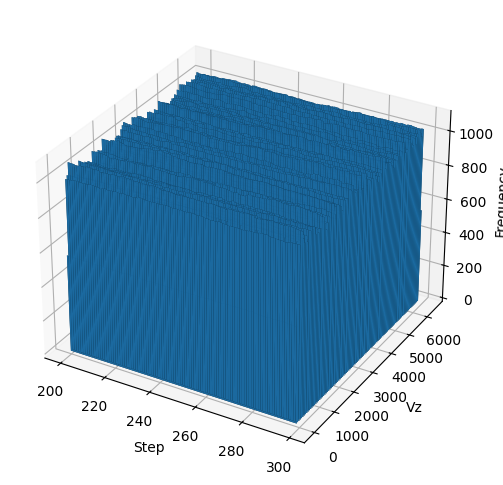

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(data['step'], data['vz'], bins=100)

# Create a 3D subplot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a grid of coordinates for the x and y edges
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Create the bars
dx = dy = 1 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Set the labels
ax.set_xlabel('Step')
ax.set_ylabel('Vz')
ax.set_zlabel('Frequency')

# Show the plot
plt.show()

In [25]:
data

,step,i,x,y,z,vx,vy,vz
0,200,0,0.211703,4.48314,44.01840,-4927790.0,-23887800.0,2448.310
1,200,1,79.739300,73.63910,14.77410,-41690800.0,26631900.0,5634.090
2,200,2,49.436100,16.39640,24.61460,-24034800.0,4676750.0,4164.340
3,200,3,12.262000,34.92240,80.10450,-3442480.0,-39600100.0,5892.420
4,200,4,46.219800,27.38860,92.82050,-2890030.0,9067990.0,3103.580
...,...,...,...,...,...,...,...,...
9999995,299,99995,86.827200,18.00330,3.14368,-22452000.0,-21638600.0,1606.010
9999996,299,99996,55.418800,4.85410,68.94970,17225600.0,-37600600.0,5727.140
9999997,299,99997,40.343100,74.83630,79.97490,24819200.0,-2952260.0,255.800
9999998,299,99998,62.596400,96.01860,52.43410,3689670.0,2882720.0,5544.980


(array([ 619., 1033., 1007., 1071., 1014.,  988., 1028.,  978.,  980.,
        1038., 1043., 1024., 1023.,  985., 1025.,  977.,  981.,  969.,
        1001., 1038.,  984.,  966.,  977., 1032., 1020., 1009., 1056.,
        1020., 1013.,  974., 1030., 1012., 1023.,  970.,  948., 1041.,
        1034., 1012.,  974., 1058., 1041., 1075., 1034., 1013., 1027.,
        1015., 1029., 1073., 1008.,  993., 1012., 1071., 1008.,  958.,
        1021., 1006.,  926.,  997., 1032.,  993.,  998.,  966.,  978.,
        1001., 1011.,  978., 1061.,  998., 1033., 1000., 1014., 1012.,
         996.,  988.,  958., 1000.,  993., 1007., 1012.,  988., 1017.,
         983., 1049.,  946.,  975., 1007.,  992., 1045., 1012.,  984.,
         984., 1027.,  980., 1016., 1035., 1042., 1022.,  998., 1035.,
         552.]),
 array([ -18.7401  ,   46.145701,  111.031502,  175.917303,  240.803104,
         305.688905,  370.574706,  435.460507,  500.346308,  565.232109,
         630.11791 ,  695.003711,  759.889512,  824.7753

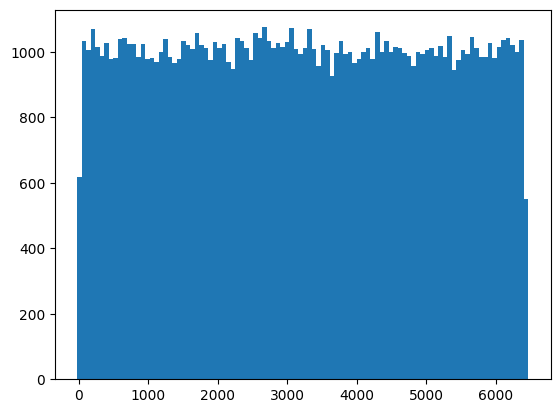

In [26]:
plt.hist(data[data['step']==299]['vz'], bins=100)

In [4]:
chunksize = 100000  # adjust to your needs
from tqdm import tqdm

chunks = []

for i, chunk in tqdm(enumerate(pd.read_csv('particle_records.csv', header=None, names=['step','i','x', 'y', 'z', 'vx', 'vy', 'vz'], chunksize=chunksize))):
    if i % 10 == 0:
        chunks.append(chunk)
    if i > 500:
        break

501it [01:20,  6.22it/s]


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,
          0.,   0.,   4.,   0.,   1.,   1.,   1.,   2.,   3.,   0.,   2.,
          0.,   2.,   1.,   2.,   1.,   2.,   0.,   1.,   2.,   2.,   0.,
          2.,   3.,   2.,   1.,   2.,   0.,   1.,   1.,   3.,   2.,   1.,
          1.,   3.,   0.,   1.,   1.,   2.,   6.,   6.,   5.,   2.,   1.,
          2.,   1.,   3.,   2.,   2.,   1.,   1.,   8.,   5.,   2.,   5.,
          7.,   4.,   2.,   6.,   6., 

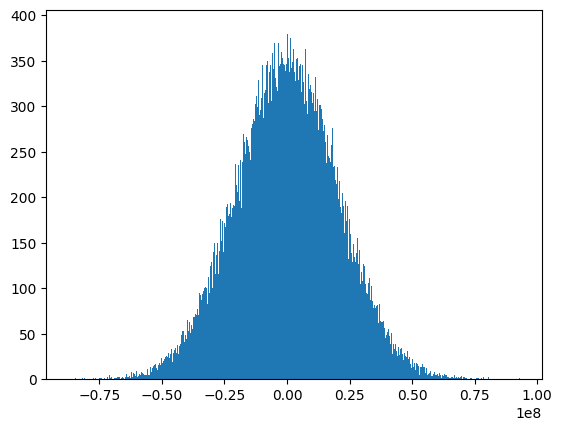

In [19]:
chunks[50]
plt.hist(chunks[50]['vx'], bins=1000)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,   0.,
          2.,   2.,   0.,   2.,   1.,   1.,   1.,   4.,   1.,   0.,   2.,
          2.,   2.,   1.,   3.,   1.,   1.,   2.,   2.,   3.,   1.,   2.,
          2.,   2.,   1.,   0.,   2., 

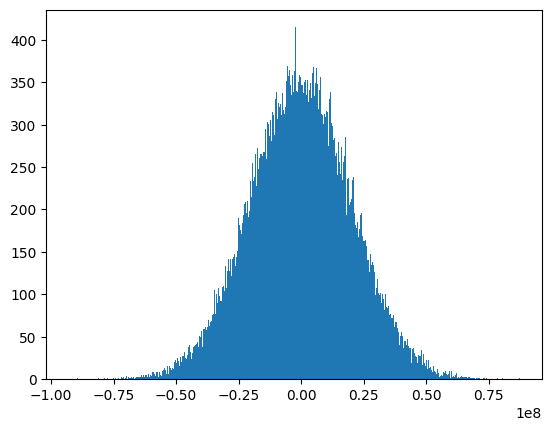

In [14]:
plt.hist(chunks[0]['vx'], bins=1000)